In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas
import plotly.express as px
from windrose import WindroseAxes

/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_76312/3879994007.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
site_list = ['Albemarle', 'Boulmer', 'Charterhall', 'Gogarbank', 'Leuchars', 'Redesdale']

# 'Penmanshiel'

df_P_2016 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=0)
df_P_2017 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=1)


df_A_2016 = pandas.read_excel(f'./datasets/{site_list[0]}.xlsx' , sheet_name=9)
df_A_2017 = pandas.read_excel(f'./datasets/{site_list[0]}.xlsx' , sheet_name=10)

df_B_2016 = pandas.read_excel(f'./datasets/{site_list[1]}.xlsx' , sheet_name=4)
df_B_2017 = pandas.read_excel(f'./datasets/{site_list[1]}.xlsx' , sheet_name=5)

df_C_2016 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=3)
df_C_2017 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=4)

df_G_2016 = pandas.read_excel(f'./datasets/{site_list[3]}.xlsx' , sheet_name=3)
df_G_2017 = pandas.read_excel(f'./datasets/{site_list[3]}.xlsx' , sheet_name=4)

df_L_2016 = pandas.read_excel(f'./datasets/{site_list[4]}.xlsx' , sheet_name=3)
df_L_2017 = pandas.read_excel(f'./datasets/{site_list[4]}.xlsx' , sheet_name=4)

df_R_2016 = pandas.read_excel(f'./datasets/{site_list[5]}.xlsx' , sheet_name=3)
df_R_2017 = pandas.read_excel(f'./datasets/{site_list[5]}.xlsx' , sheet_name=4)


In [3]:
# standardising column names 

list_df = [df_A_2016, df_A_2017,  df_B_2016, df_B_2017, df_C_2016, df_C_2017, df_G_2016, df_G_2017, df_L_2016, df_L_2017, df_R_2016, df_R_2017]

# P has different columns

for df in list_df:
    df.columns = ['datetime', 'mean_wind_dir', 'mean_speed_knots']


df_P_2016.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']
df_P_2017.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']

In [4]:
# add m/s windspeed to datasets
# remove last row of data 
# use pandas datetime

for i in range(len(list_df)):
    list_df[i]['mean_speed_ms'] = list_df[i]['mean_speed_knots'] * (1 / 1.94384)
    
    # Drop the last row
    last_index = list_df[i].index[-1]
    list_df[i].drop(last_index, inplace=True)
    
    list_df[i]['datetime_dt'] = pandas.to_datetime(list_df[i]['datetime'])
    list_df[i].set_index('datetime_dt', inplace=True)



df_P_2016['datetime_dt'] = pandas.to_datetime(df_P_2016['datetime'])
df_P_2017['datetime_dt'] = pandas.to_datetime(df_P_2017['datetime'])

# Set datetime as index
df_P_2016.set_index('datetime_dt', inplace=True)
df_P_2017.set_index('datetime_dt', inplace=True)


In [5]:
df_P_2016_H = df_P_2016.resample('H').mean()
df_P_2017_H = df_P_2017.resample('H').mean()

/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_76312/4056428089.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_P_2016_H = df_P_2016.resample('H').mean()
/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_76312/4056428089.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_P_2017_H = df_P_2017.resample('H').mean()


In [6]:
# stack vertically

df_P_H = pandas.concat([df_P_2016_H, df_P_2017_H], axis = 0)
df_A_H = pandas.concat([df_A_2016, df_A_2017], axis = 0)

In [7]:
df_A_H

,datetime,mean_wind_dir,mean_speed_knots,mean_speed_ms
datetime_dt,,,,
2016-01-01 00:00:00,2016-01-01 00:00:00,250.0,10.0,5.144456
2016-01-01 01:00:00,2016-01-01 01:00:00,250.0,7.0,3.601119
2016-01-01 02:00:00,2016-01-01 02:00:00,250.0,6.0,3.086674
2016-01-01 03:00:00,2016-01-01 03:00:00,220.0,4.0,2.057783
2016-01-01 04:00:00,2016-01-01 04:00:00,230.0,4.0,2.057783
...,...,...,...,...
2017-12-31 19:00:00,2017-12-31 19:00:00,230.0,4.0,2.057783
2017-12-31 20:00:00,2017-12-31 20:00:00,240.0,7.0,3.601119
2017-12-31 21:00:00,2017-12-31 21:00:00,240.0,6.0,3.086674


In [8]:
common_start = max(df_P_H.index.min(), df_A_H.index.min())
common_end = min(df_P_H.index.max(), df_A_H.index.max())

In [9]:
df_P_H_common = df_P_H[common_start:common_end]
df_A_H_common = df_A_H[common_start:common_end]



In [10]:
x = np.array(df_P_H_common['mean_speed_ms'])
y = np.array(df_A_H_common['mean_speed_ms'])

len(x)


13758

In [11]:
len(y)

13746

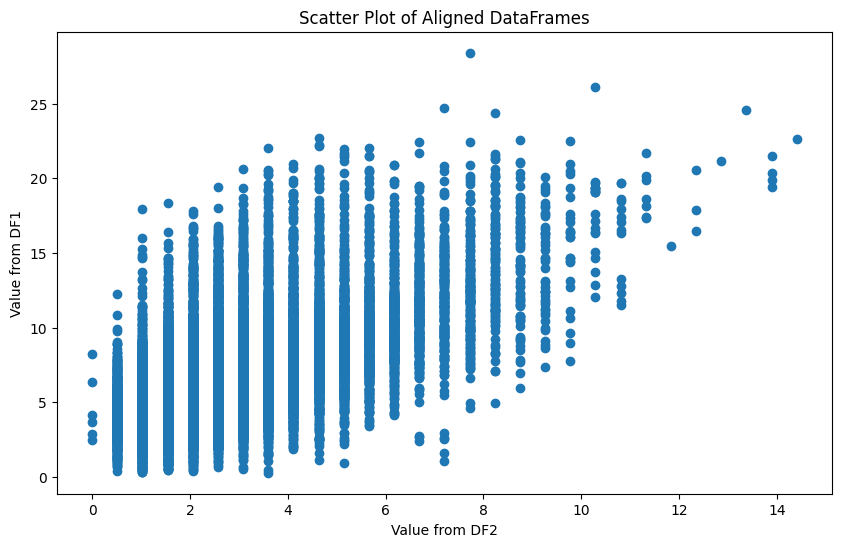

In [12]:
df1_common = df_P_H_common
df2_common = df_A_H_common

df1_common = df1_common.dropna()
df2_common = df2_common.dropna()

aligned_df1, aligned_df2 = df1_common.align(df2_common, join='inner', axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(aligned_df2['mean_speed_ms'], aligned_df1['mean_speed_ms'])
plt.xlabel('Value from DF2')
plt.ylabel('Value from DF1')
plt.title('Scatter Plot of Aligned DataFrames')
plt.show()


In [13]:
from scipy import stats


x = aligned_df2['mean_speed_ms']
y = aligned_df1['mean_speed_ms']


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

In [14]:
print(aligned_df1['mean_speed_ms'].describe())
print(aligned_df2['mean_speed_ms'].describe())

count    13559.000000
mean         7.454075
std          3.662172
min          0.266667
25%          4.896667
50%          6.856667
75%          9.390833
max         28.416667
Name: mean_speed_ms, dtype: float64
count    13559.000000
mean         3.160659
std          1.923376
min          0.000000
25%          1.543337
50%          2.572228
75%          4.115565
max         14.404478
Name: mean_speed_ms, dtype: float64


In [15]:
def distance_from_line(x, y, slope, intercept):
    return abs(slope * x - y + intercept) / (slope**2 + 1)**0.5

distances = distance_from_line(x, y, slope, intercept)

# Normalize distances
norm_distances = (distances - distances.min()) / (distances.max() - distances.min())


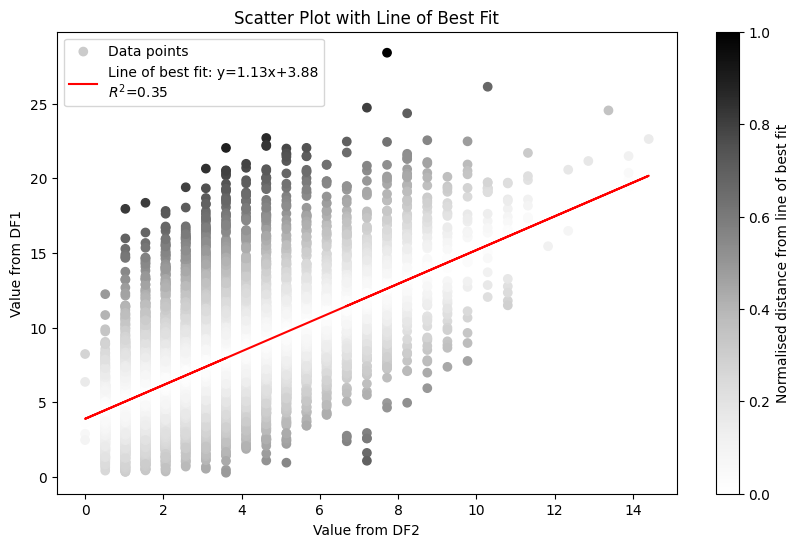

In [16]:
import matplotlib.pyplot as plt

inverted_norm_distances = 1 - norm_distances

plt.figure(figsize=(10, 6))

# Create scatter plot
scatter = plt.scatter(x, y, c=norm_distances, cmap='Grays', label='Data points')

# Add line of best fit
plt.plot(x, slope*x + intercept, color='red', label=f'Line of best fit: y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_squared:.2f}')

plt.xlabel('Value from DF2')
plt.ylabel('Value from DF1')
plt.title('Scatter Plot with Line of Best Fit')
plt.colorbar(scatter, label='Normalised distance from line of best fit')
plt.legend()
plt.show()


In [17]:
def MCP_graph(df1, df2, df1_name, df2_name):

    common_start = max(df1.index.min(), df2.index.min())
    common_end = min(df1.index.max(), df2.index.max())

    df1_common = df1[common_start:common_end]
    df2_common = df2[common_start:common_end]

    df1_common = df1_common.dropna()
    df2_common = df2_common.dropna()

    aligned_df1, aligned_df2 = df1_common.align(df2_common, join='inner', axis=0)

    x = aligned_df2['mean_speed_ms']
    y = aligned_df1['mean_speed_ms']


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2

    distances = distance_from_line(x, y, slope, intercept)

    # Normalize distances
    norm_distances = (distances - distances.min()) / (distances.max() - distances.min())

    plt.figure(figsize=(10, 6))

    # Create scatter plot

    #scatter = plt.scatter(x, y, label='Data points')

    scatter = plt.scatter(x, y, c=norm_distances, cmap='Grays', label='Data points')

    # Add line of best fit
    plt.plot(x, slope*x + intercept, color='red', label=f'Line of best fit: y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_squared:.2f}')

    plt.xlabel(f'{df2_name}')
    plt.ylabel(f'{df1_name}')
    plt.title(f'{df1_name} v {df2_name} Correlation, 2016/2017')
    plt.colorbar(scatter, label='Normalised distance from line of best fit')
    plt.legend()

    plt.savefig(f'{df1_name}_{df2_name}_2016_2017.png', dpi=300)

    plt.show()
    

    
    
#df_P_H

In [18]:
df_A_H = pandas.concat([df_A_2016, df_A_2017], axis = 0)
df_B_H = pandas.concat([df_B_2016, df_B_2017], axis = 0)
df_C_H = pandas.concat([df_C_2016, df_C_2017], axis = 0)
df_G_H = pandas.concat([df_G_2016, df_G_2017], axis = 0)
df_L_H = pandas.concat([df_L_2016, df_L_2017], axis = 0)
df_R_H = pandas.concat([df_R_2016, df_R_2017], axis = 0)




# MCP_graph(df_P_H, df_A_H, 'P', 'A')
# MCP_graph(df_P_H, df_B_H, 'P', 'B')
# MCP_graph(df_P_H, df_C_H, 'P', 'C')
# MCP_graph(df_P_H, df_G_H, 'P', 'A')
# MCP_graph(df_P_H, df_L_H, 'P', 'L')
# MCP_graph(df_P_H, df_R_H, 'P', 'R')





In [19]:
df_P_H.columns

Index(['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir'], dtype='object')

In [21]:
# characterise the wind at P

df_P_10mins = pandas.concat([df_P_2016, df_P_2017], axis = 0)


df_P_10mins['wind_dir_rounded'] = df_P_10mins['mean_wind_dir'].round()

dir_vcounts = df_P_10mins['wind_dir_rounded'].value_counts().reset_index(drop = False)

dir_vcounts

,wind_dir_rounded,count
0,203.0,589
1,198.0,583
2,208.0,581
3,200.0,579
4,201.0,576
...,...,...
356,94.0,53
357,90.0,51
358,70.0,50
359,91.0,50


In [22]:
mean_speed_per_dir = df_P_10mins.groupby('wind_dir_rounded')['mean_speed_ms'].mean().reset_index()


merged_data = pandas.merge(dir_vcounts, mean_speed_per_dir, on='wind_dir_rounded')
merged_data

,wind_dir_rounded,count,mean_speed_ms
0,203.0,589,8.100017
1,198.0,583,7.807479
2,208.0,581,7.835818
3,200.0,579,7.752625
4,201.0,576,8.031302
...,...,...,...
356,94.0,53,5.034151
357,90.0,51,5.326275
358,70.0,50,4.968800
359,91.0,50,4.995000


In [39]:
fig = px.bar_polar(merged_data, r="count", theta='wind_dir_rounded',
                   color='mean_speed_ms',
                   template="none", barmode='relative',
                   color_continuous_scale=px.colors.sequential.Plasma_r,
                   barnorm="percent")

# Adjust the color bar position
fig.update_layout(coloraxis_colorbar=dict(
    x=0.93,  # Adjusts left-right position
    y=0.5,   # Adjusts top-bottom position
    len=0.75 # Adjusts the length of the color bar
))

fig.update_layout(title='Direction and Mean Windspeed Trend for Penmanshiel')


fig.write_image('testrose.png', scale=3)  # scale parameter controls the resolution

fig.show()

In [ ]:
mean_speed_per_dir = df_P_10mins.groupby('wind_dir_rounded')['mean_speed_ms'].mean().reset_index()
merged_data = pandas.merge(dir_vcounts, mean_speed_per_dir, on='wind_dir_rounded')

# need to add turbulence intensity column